# Space Titanic 🚢 
# 🎯 Score: 0.80476

# Approximate Dataset Analysis Steps:

1. **File and Data Field Descriptions**: Review the provided descriptions of the files and data fields to understand the dataset's structure and variables.

2. **Data Preprocessing**: Handle any missing or erroneous data, perform data type conversions, and clean the dataset for further analysis.

3. **Exploratory Data Analysis (EDA)**: Explore the dataset to gain insights into its distribution, relationships, and patterns. Visualize key features and relationships between variables.

4. **Feature Engineering**: Create new meaningful features or transform existing features to improve model performance.

5. **Data Splitting**: Split the training dataset (train.csv) into features (X) and the target variable (y) to prepare for model training.

6. **Model Training**: Utilize machine learning algorithms to train a predictive model on the training data.

7. **Model Evaluation**: Evaluate the trained model's performance using appropriate metrics and techniques.

8. **Model Tuning**: Fine-tune the model's hyperparameters to optimize its predictive capabilities.

9. **Predictions on Test Data**: Apply the trained model to the test dataset (test.csv) to generate predictions for the 'Transported' target variable.

10. **Submission**: Create a submission file in the correct format (submission.csv) with PassengerId and predicted values for 'Transported' for each passenger in the test set.

11. **Submit**: Submit the prediction file for scoring and ranking.

# File and Data Field Descriptions

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

* `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
* `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* `Destination` - The planet the passenger will be debarking to.
* `Age` - The age of the passenger.
* `VIP` - Whether the passenger has paid for special VIP service during the voyage.
* `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* `Name` - The first and last names of the passenger.
* `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

**sample_submission.csv** - A submission file in the correct format.
**PassengerId** - Id for each passenger in the test set.
**Transported** - The target. For each passenger, predict either True or False.

---




# Libraries

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Импорт модулей для сериализации и случайных чисел
import pickle
import random
import subprocess

# Импорт классов и функций для предобработки данных и оценки моделей
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from scipy.interpolate import interp1d
from sklearn.preprocessing import LabelEncoder


# Импорт моделей для классификации
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgbm
import catboost as catb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier


# Игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

# Конфигурация формата графиков
%config InlineBackend.figure_format = 'svg'
sns.set(style="whitegrid")

# Data Path

In [2]:
# Path to the original training dataset in CSV format
DATASET_PATH = './data/train.csv'

# Path to the pre-prepared training dataset in CSV format
PREPREPARED_TRAIN_DATASET_PATH = './pre_ready_train/pre_prepared_train.csv'

# Path to the pre-prepared test dataset in CSV format
PREPREPARED_TEST_DATASET_PATH = './pre_ready_test/pre_prepared_test.csv'

# Path to the original test dataset in CSV format
TEST_DATASET_PATH = './data/test.csv'

# Path to the prepared test dataset in CSV format
PREPARED_TEST_DATASET_PATH = './prepared_test/prepared_test.csv'

# Path to store the predicted dataset (submission file) in CSV format
PREDICTED_DATASET_PATH = './predicted/submission.csv'

# File path to store the scaler used for data normalization or standardization
SCALER_FILE_PATH = './scaler/scaler.pkl'

# File path to store the trained machine learning model
MODEL_PATH = './model/model.pkl'


# Load Data

In [3]:
# Reading the training dataset from the CSV file specified by DATASET_PATH
df_train = pd.read_csv(DATASET_PATH)

# Reading the test dataset from the CSV file specified by TEST_DATASET_PATH
df_test = pd.read_csv(TEST_DATASET_PATH)

# Displaying the first few rows of the training dataset (default is 5 rows)
df_train.head()


PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

# Exploratory Data Analysis

In [4]:
# Displaying information about the training dataset (df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### For following analysis we should split the columns `'PassengerId'` and `'Cabin'`, since the dataset will be more informative and without this data the exploratory analysis will not be full enough.

---

## Split The Collumns `'Cabin'`, `'PassengerId'` 

In [5]:
# Splitting the 'Cabin' column into 'Deck', 'CabinNumber', and 'Side' using the '/' separator in df_train
df_train['Deck'], df_train['CabinNumber'], df_train['Side'] = df_train['Cabin'].str.split('/').str

# Splitting the 'PassengerId' column into 'GroupId' and 'NumberInGroup' using the '_' separator in df_train
df_train['GroupId'], df_train['NumberInGroup'] = df_train['PassengerId'].str.split('_').str

# Converting the 'GroupId' column to integer data type in df_train
df_train['GroupId'] = df_train['GroupId'].astype(int)

# Converting the 'CabinNumber' column to float data type in df_train
df_train['CabinNumber'] = df_train['CabinNumber'].astype(float)


# Splitting the 'Cabin' column into 'Deck', 'CabinNumber', and 'Side' using the '/' separator in df_test
df_test['Deck'], df_test['CabinNumber'], df_test['Side'] = df_test['Cabin'].str.split('/').str

# Splitting the 'PassengerId' column into 'GroupId' and 'NumberInGroup' using the '_' separator in df_test
df_test['GroupId'], df_test['NumberInGroup'] = df_test['PassengerId'].str.split('_').str

# Converting the 'GroupId' column to integer data type in df_test
df_test['GroupId'] = df_test['GroupId'].astype(int)

# Converting the 'CabinNumber' column to float data type in df_test
df_test['CabinNumber'] = df_test['CabinNumber'].astype(float)


In [6]:
# Generating a statistical summary of the training dataset (df_train)
df_train.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  CabinNumber      GroupId  
count   8505.000000  8494.000000  8693.000000  
mean     304.854791   600.367671  4633.389624  
std     1145.717189   511.867226  2671.028856  
min        0.000000     0.000000     1.000000  
25%        0.000000   167.250000  2319.000000  
50%        0.000000   427.000000  4630.000000  
75%       46.000000   999.000000  6883.000000  
max    24133.000000  1894.000000  9280.000000

1. Age: The age of the passengers. The values range from 0 to 79, with a mean age of approximately 28.83 and a standard deviation of approximately 14.49.

2. RoomService: This feature represents some aspect of room service on the cruise ship. The values range from 0 to 14327, with a mean value of approximately 224.69 and a standard deviation of approximately 666.72.

3. FoodCourt: This feature represents some aspect of the food court or dining facilities on the cruise ship. The values range from 0 to 29813, with a mean value of approximately 458.08 and a standard deviation of approximately 1611.49.

4. ShoppingMall: This feature represents some aspect of the shopping mall on the cruise ship. The values range from 0 to 23492, with a mean value of approximately 173.73 and a standard deviation of approximately 604.70.

5. Spa: This feature represents some aspect of the spa facilities on the cruise ship. The values range from 0 to 22408, with a mean value of approximately 311.14 and a standard deviation of approximately 1136.71.

6. VRDeck: This feature represents some aspect of the virtual reality deck or entertainment on the cruise ship. The values range from 0 to 24133, with a mean value of approximately 304.85 and a standard deviation of approximately 1145.72.

In [7]:
# Generating a statistical summary of the categorical (object) columns in the training dataset (df_train)
df_train.describe(include='object')


PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         8693       8492      8476     8494         8511   8490   
unique        8693          3         2     6560            3      2   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e  False   
freq             1       4602      5439        8         5915   8291   

                  Name  Deck  Side NumberInGroup  
count             8493  8494  8494          8693  
unique            8473     8     2             8  
top     Gollux Reedall     F     S            01  
freq                 2  2794  4288          6217

1. PassengerId: A unique identifier for each passenger. There are 8693 passengers in total, and each passenger has a unique ID.

2. HomePlanet: The home planet of the passengers. There are three unique home planets: Earth, and two other unidentified planets.

3. CryoSleep: A binary feature indicating whether the passenger is in cryosleep or not. It has two unique values: True (in cryosleep) and False (not in cryosleep).

4. Cabin: The cabin number or identifier assigned to each passenger. There are 6560 unique cabins, indicating that some passengers may share the same cabin.

5. Destination: The destination of the space journey for each passenger. There are three unique destinations, denoted by their names.

6. VIP: A binary feature indicating whether the passenger is a VIP or not. It has two unique values: True (VIP) and False (not VIP).

7. Name: The name of the passengers. There are 8473 unique names, indicating that some passengers may share the same name.

## Data Types

In [8]:
# Displaying the data types of each column in the training dataset (df_train)
df_train.dtypes


PassengerId       object
HomePlanet        object
CryoSleep         object
Cabin             object
Destination       object
Age              float64
VIP               object
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Name              object
Transported         bool
Deck              object
CabinNumber      float64
Side              object
GroupId            int64
NumberInGroup     object
dtype: object

In [9]:
# The target feature we want to predict or model
target_feature = 'Transported'

# Categorical features with object or bool data types, excluding specified columns
categorical_features = df_train.drop(columns=[
    'PassengerId', 'Name', 'Cabin', 'Transported']).select_dtypes(include=['object', 'bool']).columns

# Numeric features with data types other than object or bool, excluding specified columns
numeric_features = df_train.drop(columns=[
    'GroupId', 'CabinNumber', 'Transported']).select_dtypes(exclude=['object', 'bool']).columns



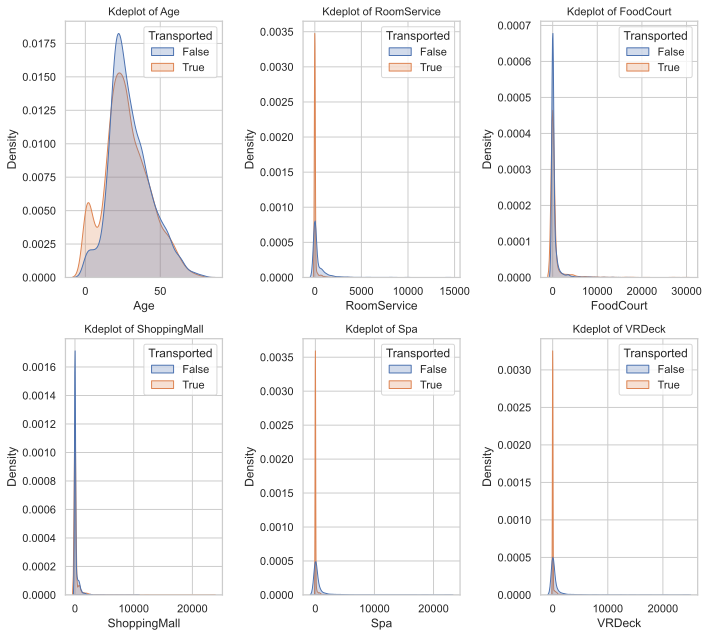

In [10]:
# Calculate the number of rows for the subplots based on the number of numeric features
n_rows = (len(numeric_features) + 2) // 3  # Ceiling division

# Generate a grid of subplots to display the KDE plots for numeric features
# with the specified number of rows (n_rows) and 3 columns, with a specific figure size.
fig, axes = plt.subplots(n_rows, 3, figsize=(10, 9), sharey=False)

# Plot KDE plots for each numeric feature
for i, feature in enumerate(numeric_features):
    # Calculate the row and column index for the subplot in the grid
    row = i // 3
    col = i % 3

    # Select the corresponding axis (subplot) from the grid
    ax = axes[row, col]

    # Plot the KDE plot for the current numeric feature
    # Hue 'Transported' indicates grouping by the target variable 'Transported'
    # Shade=True adds shading to the KDE plot areas
    chart = sns.kdeplot(data=df_train, x=feature, hue='Transported', shade=True, ax=ax)

    # Set the title for the current subplot
    ax.set_title(f'Kdeplot of {feature}', fontsize=11)

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the grid of KDE plots
plt.show()

**Наблюдения:**
    
   1. Признак возраст распределен более нормально относительно остальных, младенцы и дети показывают значительный отрыв в количестве 'Transported', чем остальные возрастные категории.
   2. Данные в признаках `'RoomService'`, `'FoodCourt'`, `'ShoppingMall'`, `'Spa'`, `'VRDeck'` данные распределены неоднородно со смещением влево, также много выбросов. Далее потребуется их обратока в процессе анализа.
   

**Observations:**


   1. The "Age" feature appears to have a more normal distribution compared to the other features. Notably, infants and children show a significant higher rate of being "Transported" compared to other age groups.

   2. As for the features `"RoomService"`, `"FoodCourt"`, `"ShoppingMall"`, `"Spa"`, and `"VRDeck"`, the data is distributed non-uniformly with a left skewness, and there are many outliers. Further processing and handling of these features will be necessary during the analysis.
    
    
    
    

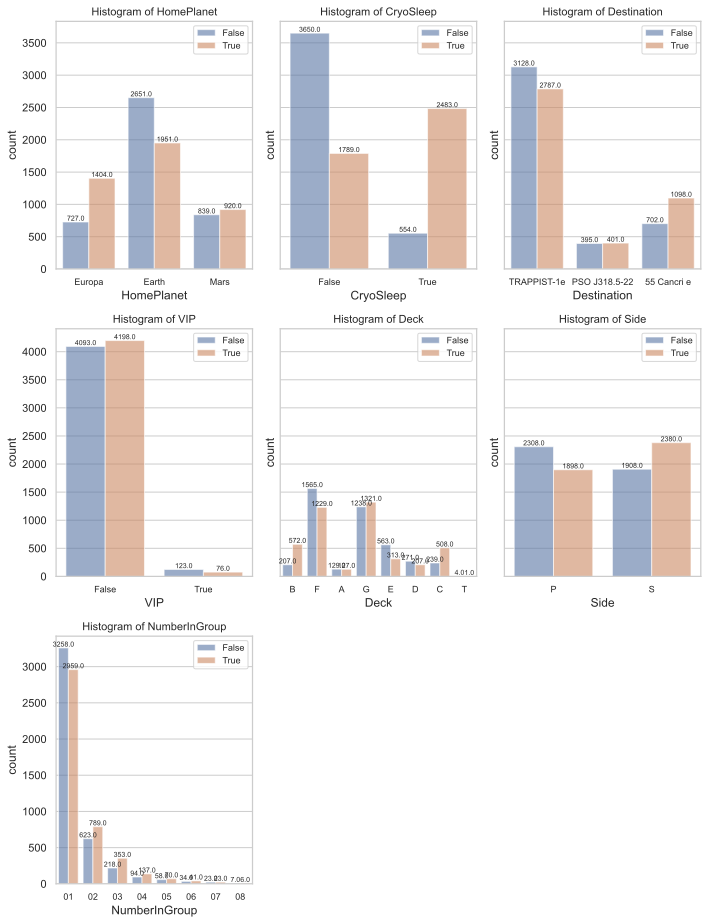

In [11]:
# Calculate the number of rows for the subplots based on the number of categorical features
n_rows = (len(categorical_features) + 2) // 3  # Ceiling division

# Generate a grid of subplots to display the count plots (histograms) for categorical features
# with the specified number of rows (n_rows) and 3 columns, with a specific figure size.
fig, axes = plt.subplots(n_rows, 3, figsize=(10, 13), sharey='row')  # Set sharey to 'row'

# Plot count plots (histograms) for each categorical feature
for i, feature in enumerate(categorical_features):
    # Skip the last empty subplot if there are fewer than 6 features
    if i < len(axes.flat):
        ax = axes.flat[i]

    # Plot the count plot (histogram) for the current categorical feature
    # Hue 'Transported' indicates grouping by the target variable 'Transported'
    # Alpha is set to 0.6 to add transparency for better visualization
    chart = sns.countplot(data=df_train, x=feature, hue='Transported', alpha=0.6, ax=ax)

    # Set the title for the current subplot
    ax.set_title(f'Histogram of {feature}', fontsize=11)

    # Set the x-axis ticks and labels for better readability
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=9)

    # Add a legend with a font size of 9
    ax.legend(fontsize=9)

    # Add count labels (count values) as x-tick labels on top of each bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', fontsize=7)

# Hide the last empty subplots if there are fewer than 6 features
for i in range(len(categorical_features), len(axes.flat)):
    axes.flat[i].axis('off')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the grid of count plots (histograms)
plt.show()




**Наблюдения:**
    
   1. Наибольшее соотношение True Transported у представителей планеты Europa.  
   2. Больше всего представителей планеты Earth, соотношение True Transported у представителей планеты Earth значительно меньше, у представителей планеты Mars распределены практически одинаково.
   3. Cоотношение True Transported у пассажиров в криосне значительно выше, чем у пассажиров, кто не пребывал в криосне.
   4. Чаще всего пассажиры путествовали в TRAPPIST-1e, но наибольшее соотношение True Transported у пассажиров направляющихся в 55 Cancri e.
   5. Статус VIP не оказывает существенного влияния на соотношение True Transported.
   6. Наибольшее соотношение True Transported у представителей палуб B, C.
   7. Признак Side делит всех рассажиров пополам, наибольшее соотношение True Transported у представителей стороны S.
   8. Чаще всего пассажиры путешествовали в одиночку, но наибольшее соотношение True Transported у групп до 4 человек.
   
   
**Observations:**

1. The highest ratio of True Transported is observed among passengers from the planet Europa.

2. There are the most representatives from planet Earth, but the ratio of True Transported among them is significantly lower. For passengers from planet Mars, the distribution is almost equal.

3. The ratio of True Transported is considerably higher for passengers who underwent cryosleep compared to those who did not.

4. The majority of passengers traveled to TRAPPIST-1e, but the highest ratio of True Transported is among passengers heading to 55 Cancri e.

5. VIP status does not significantly influence the ratio of True Transported.

6. The highest ratio of True Transported is among passengers from decks B and C.

7. The "Side" feature divides all passengers in half, with the highest ratio of True Transported among those from side S.

8. Most passengers traveled alone, but the highest ratio of True Transported is observed among groups of up to 4 people.

   
   

## Target Feature Analysis

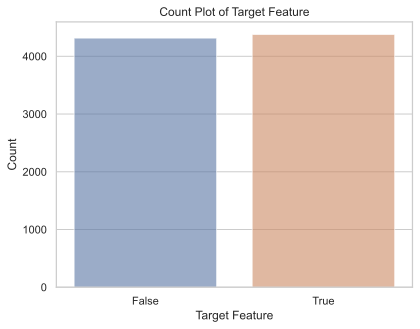

In [12]:
# Create a count plot for the target feature 'Transported' in the DataFrame df_train
# Alpha is set to 0.6 to add transparency for better visualization
sns.countplot(data=df_train, x=target_feature, alpha=0.6)

# Labels for the axes and a title for the plot
plt.xlabel('Target Feature')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.title('Count Plot of Target Feature')  # Title for the plot

# Show the plot
plt.show()


**Наблюдения:**
    1. Данные распределены равномерно, практически равны
    
    

## Dependencies

* По моему опыту, между группами и номерами кабин или палуб существует определенная зависимость. Необходимо исследовать эту зависимость, которую мы в дальнейшем можем использовать для заполнения пропусков и анализа данных.

---

* Based on my experience, there seems to be a certain correlation between groups, cabin numbers, and decks. It is essential to investigate this correlation, which can be utilized for filling in missing values and analyzing the data further.

---


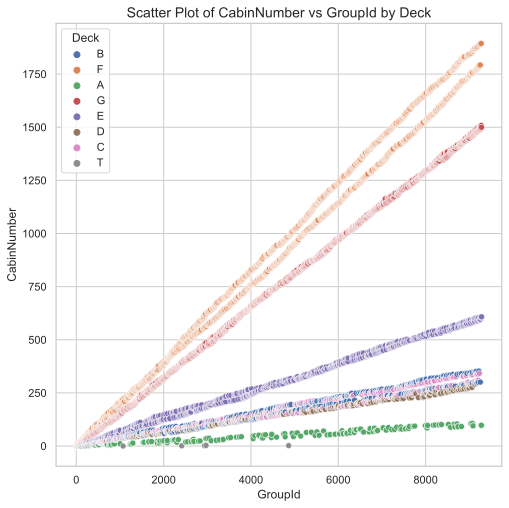

In [13]:
# Set the figure size for the scatter plot
plt.figure(figsize=(8, 8))

# Create a scatter plot with 'CabinNumber' on the y-axis and 'GroupId' on the x-axis
# Points are colored based on the 'Deck' column from the DataFrame df_train
sns.scatterplot(y='CabinNumber', x='GroupId', hue='Deck', data=df_train)

# Add a title and labels for the x-axis and y-axis to the plot
plt.title('Scatter Plot of CabinNumber vs GroupId by Deck', fontsize=14)
plt.xlabel('GroupId', fontsize=12)
plt.ylabel('CabinNumber', fontsize=12)

# Show the scatter plot
plt.show()


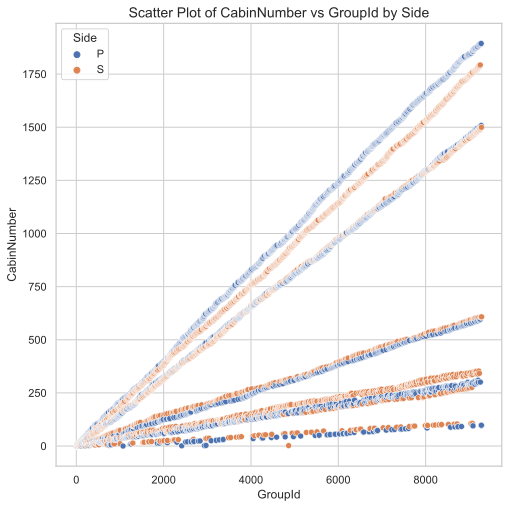

In [14]:
# Set the figure size for the scatter plot
plt.figure(figsize=(8, 8))

# Create a scatter plot with 'CabinNumber' on the y-axis and 'GroupId' on the x-axis
# Points are colored based on the 'Side' column from the DataFrame df_train
sns.scatterplot(y='CabinNumber', x='GroupId', hue='Side', data=df_train)

# Add a title and labels for the x-axis and y-axis to the plot
plt.title('Scatter Plot of CabinNumber vs GroupId by Side', fontsize=14)
plt.xlabel('GroupId', fontsize=12)
plt.ylabel('CabinNumber', fontsize=12)

# Show the scatter plot
plt.show()


**Наблюдения:**
  
  1. Данные находятся в определенной зависимости. Данный факт будем использовать для заполнения пропусков в значениях признака `"CabinNumber"`
  
  
**Observations:**

1. The data exhibits a certain pattern of dependency. We will use this information to fill in the missing values in the `"CabinNumber"` feature.

# Missing Data Analysis

In [15]:
# Check for missing values in each column of the training dataset (df_train)
df_train.isna().sum()

PassengerId        0
HomePlanet       201
CryoSleep        217
Cabin            199
Destination      182
Age              179
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
Deck             199
CabinNumber      199
Side             199
GroupId            0
NumberInGroup      0
dtype: int64

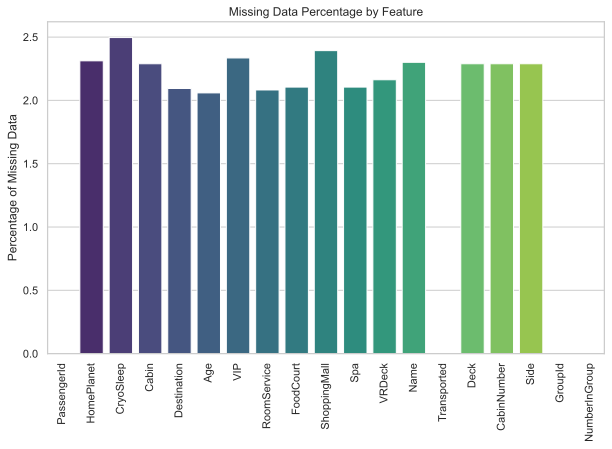

In [16]:
# Calculate the percentage of missing data for each feature in the training dataset (df_train)
missing_percentage = (df_train.isnull().sum() / len(df_train)) * 100

# Create a bar chart to visualize the missing data percentage
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.ylabel('Percentage of Missing Data')
plt.title('Missing Data Percentage by Feature')
plt.show()


## Analyzing Overlapping Missing Values

In [17]:
# Create dictionaries to store rows with overlapping missing values and rows with unique missing values
overlapping_indices = {}
unique_missing_indices = {}


# Iterate through each row (key) and its corresponding items in the DataFrame
for key, items in df_train.iterrows():
    # Calculate the count of missing values in the current row
    missing_count = df_train.loc[key].isna().sum(axis=0)
    
    # If there are more than 1 missing values in the row, add it to the overlapping_indices dictionary
    if missing_count > 1:
        overlapping_indices[key] = df_train.columns[df_train.loc[key].isna()].tolist()
    
    # If there is exactly 1 missing value in the row, add it to the unique_missing_indices dictionary
    elif 1 <= missing_count < 2:
        unique_missing_indices[key] = df_train.columns[df_train.loc[key].isna()].tolist()

# Initialize counters for rows with 2 missing values and rows with 3 or more missing values
missing_values_counter_2 = 0
missing_values_counter_3 = 0

# Iterate through the rows with overlapping missing values and count the occurrences of 2 and 3+ missing values
for key, value in overlapping_indices.items():
    if len(value) > 2:
        missing_values_counter_3 += 1
    else:
        missing_values_counter_2 += 1


print(f"Number of rows with 2 overlapping missing values: {missing_values_counter_2}")
print(f"Number of rows with 3 overlapping missing values: {missing_values_counter_3}")
print(f"Number of rows with unique missing values: {len(unique_missing_indices)}")
print(f"Total number of unique observations: \
{len(unique_missing_indices) + missing_values_counter_2 + missing_values_counter_3}")

Number of rows with 2 overlapping missing values: 167
Number of rows with 3 overlapping missing values: 211
Number of rows with unique missing values: 1709
Total number of unique observations: 2087


**Given that removing all missing values will result in the loss of 2087 unique observations, it is reasonable to consider filling in the missing values rather than deleting them. By filling in the missing data, we can retain more data points, and the resulting dataset will be more representative and contain valuable information for analysis and modeling.**

---

# Handling Missing Values

## Filling in `'CabinNumber'` , `'Deck'`, `'Side'`, `'HomePlanet'`, `'Destination'` Missing Data

In [18]:
df_train.isna().sum()

PassengerId        0
HomePlanet       201
CryoSleep        217
Cabin            199
Destination      182
Age              179
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
Deck             199
CabinNumber      199
Side             199
GroupId            0
NumberInGroup      0
dtype: int64

## Using "Neighboring" Approach to fill is values in `'CabinNumber'`, `'Deck'`, `'Side'`, `'HomePlanet'`, `'Destination'`.

In [19]:
# Create empty dictionaries to store missing values and filling values
missing_value = {}
filling_value = {}

# Get the column index of 'GroupId' in the DataFrame
col_index = df_train.columns.get_loc('GroupId')

# List of columns that are neighbors to the 'GroupId' column
neighbour_group_id = ['CabinNumber', 'Deck', 'Side', 'HomePlanet', 'Destination']

# Loop through both DataFrames: df_train and df_test
for df in [df_train, df_test]:
    # Loop through each neighbor column ('CabinNumber', 'Deck', 'Side', 'HomePlanet', 'Destination')
    for neighbour in neighbour_group_id:
        # Step 1: Find the missing cabins for the current neighbor column
        missing_value.clear()  # Clear the dictionary for the current neighbor column
        missing_value.update({i: row.values[col_index] for i, row in df.iterrows() if pd.isna(row[neighbour])})

        # Step 2: Find the corresponding filling value for each missing cabin
        filling_value.clear()  # Clear the dictionary for the current neighbor column
        for key, value in missing_value.items():
            condition = (df['GroupId'] == value) & (df[neighbour].notna())
            if condition.any():
                filling_value[value] = df.loc[condition, neighbour].values[0]

        # Step 3: Fill the missing values in the current neighbor column
        for key, value in missing_value.items():
            if value in filling_value:
                df.at[key, neighbour] = filling_value[value]



In [20]:
# Get the data types of each column in the training dataset (df_train)
df_train.dtypes


PassengerId       object
HomePlanet        object
CryoSleep         object
Cabin             object
Destination       object
Age              float64
VIP               object
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Name              object
Transported         bool
Deck              object
CabinNumber      float64
Side              object
GroupId            int64
NumberInGroup     object
dtype: object

## Filling Missinng Values in `'HomePlanet'`, `'Age'`, `'Destination''

In [21]:
# Function to calculate the mode of a series
def get_mode(series):
    """
    Calculate the mode of the input pandas Series.

    Parameters:
        series (pandas.Series): The input Series for which the mode needs to be calculated.

    Returns:
        mode_value (float or numpy.nan): The mode value of the Series, or numpy.nan if no mode exists.
    """

    # Calculate the mode of the input Series using pandas mode() method.
    mode_series = series.mode()
    # Return the calculated mode value.
    return mode_series.iat[0] if not mode_series.empty else np.nan

# Loop through both DataFrames: df_train and df_test
for df in [df_train, df_test]:
    # Step 1: Fill missing values in the 'HomePlanet' column
    # Fill with the mode of 'HomePlanet' within each 'Deck'
    HomePlanet_mode = df.groupby(['Deck'])['HomePlanet'].transform(lambda x: x.mode()[0])
    df['HomePlanet'] = df['HomePlanet'].fillna(HomePlanet_mode)
    # Fill any remaining missing values in 'HomePlanet' with the overall mode
    df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])

    # Step 2: Fill missing values in the 'Age' column
    # Fill with the mean age within each combination of 'HomePlanet' and 'Deck'
    home_planet_deck_mean_age = df.groupby(['HomePlanet', 'Deck'])['Age'].transform(lambda x: x.mean())
    df['Age'] = df['Age'].fillna(home_planet_deck_mean_age)
    # Fill any remaining missing values in 'Age' with the overall mean
    df['Age'] = df['Age'].fillna(df['Age'].mean())

    # Step 3: Fill missing values in the 'Destination' column
    # Fill with the mode of 'Destination' within each combination of 'HomePlanet', 'Deck', and 'Age'
    home_planet_deck_mode_destination = df.groupby(['HomePlanet', 'Deck', 'Age'])['Destination'].transform(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df['Destination'] = df['Destination'].fillna(home_planet_deck_mode_destination)

    # Fill with the mode of 'Destination' within each combination of 'HomePlanet' and 'Deck'
    home_planet_deck_mode_destination = df.groupby(['HomePlanet', 'Deck'])['Destination'].transform(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    df['Destination'] = df['Destination'].fillna(home_planet_deck_mode_destination)
    # Fill any remaining missing values in 'Destination' with the overall mode
    df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])

    # Step 4: Fill missing values in the 'Deck' column
    # Fill 'Deck' with mode within each combination of 'HomePlanet' and 'Age'
    df['Deck'] = df.groupby(['HomePlanet', 'Age'])['Deck'].apply(lambda x: x.fillna(get_mode(x)))
    # Fill any remaining missing values in 'Deck' with the overall mode
    df['Deck'] = df['Deck'].fillna(df['Deck'].mode()[0])


## Filling in `'CabinNumber'` by Interpolating Data and Create Markers for Visualization

In [22]:
# Loop through both DataFrames: df_train and df_test
for df in [df_train, df_test]:
    deck = {}

    # Step 1: Create DataFrames for each unique value in 'Deck' and add marker and filled CabinNumber columns
    for key, val in enumerate(df['Deck'].unique()):
        deck[key] = df[df['Deck'] == val]
        # Add a marker column with value 1 if 'CabinNumber' is NaN, else 0
        df[val + '_marker'] = deck[key]['CabinNumber'].apply(lambda x: 1 if pd.isna(x) else 0)
        # Interpolate missing 'CabinNumber' values using polynomial interpolation of order 1 (linear interpolation)
        df[val + '_CabinNumber_filled'] = deck[key]['CabinNumber'].interpolate(method='polynomial', order=1)

    # Step 2: Fill the 'CabinNumber' column in the original DataFrame using the interpolated values
    for i in df['Deck'].unique():
        mask = (df['Deck'] == i) & (df['CabinNumber'].isna())
        df.loc[mask, 'CabinNumber'] = df.loc[mask, i + '_CabinNumber_filled']

    # Finally, you can remove the intermediate DataFrames stored in the `deck` dictionary.
    del deck

    # Remove the '_CabinNumber_filled' columns from the DataFrame
    for i in df['Deck'].unique():
        del df[i + '_CabinNumber_filled']

    # Fill the marker columns with 0 for the remaining NaN values
    for i in df['Deck'].unique():
        df[i + '_marker'].fillna(0, inplace=True)
        df[i + '_marker'] = df[i + '_marker'].astype(int)

    # Apply rounding to 'CabinNumber' to get integer values
    df['CabinNumber'] = df['CabinNumber'].apply(lambda x: int(x + 0.5) if x % 1 > 0.5 else int(x))


## Filling in `'CabinNumber'` Visualization

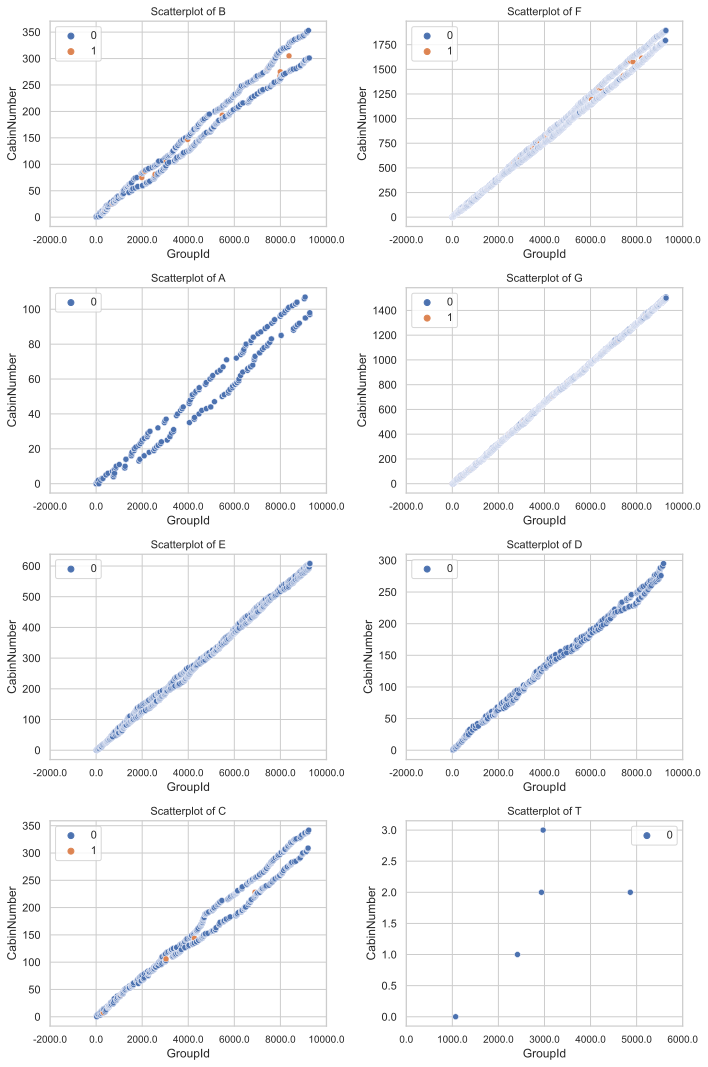

In [23]:
# Create a 4x2 grid of subplots with the given figure size
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# Get a list of all features in the DataFrame (columns in df_train)
features = df_train.columns.tolist()

# Plot scatter plots for each unique value of 'Deck' in df_train
for i, feature in enumerate(df_train['Deck'].unique()):
    if i < len(axes.flat):  # To skip the last empty subplot if there are fewer than 8 unique values of 'Deck'
        ax = axes.flat[i]

        # Select data for the current 'Deck' value
        data = df_train[df_train['Deck'] == feature]

        # Create a scatter plot with 'CabinNumber' on the y-axis and 'GroupId' on the x-axis
        # Points are colored based on the marker column (feature + '_marker')
        sns.scatterplot(data=data, x='GroupId', y='CabinNumber', hue=feature + '_marker', ec='ghostwhite', ax=ax)

        # Set the title and labels for the x-axis and y-axis
        ax.set_title(f'Scatterplot of {feature}', fontsize=11)
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticks(), rotation=0, fontsize=10)
        ax.legend()

# Hide the last empty subplots (if there are fewer than 8 unique values of 'Deck')
for i in range(len(features), len(axes.flat)):
    axes.flat[i].axis('off')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plot
plt.show()


## Filling In `'Side'` Missing Values

In [24]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Loop through both DataFrames: df_train and df_test
for df in [df_train, df_test]:
    # Step 1: Encode the 'Side' column using LabelEncoder
    df['Side_encoded'] = label_encoder.fit_transform(df['Side'])
    df.loc[df['Side_encoded'] == 2, 'Side_encoded'] = np.nan

    # Create a DataFrame with non-missing values of 'Side' and 'GroupId' for interpolation
    data_interpolate = df.dropna(subset=['Side_encoded', 'GroupId'])

    # Sort the DataFrame by 'GroupId' to ensure correct interpolation
    data_interpolate = data_interpolate.sort_values(by='GroupId')

    # Create an interpolation function for 'Side' based on 'GroupId' using linear interpolation
    interp_func = interp1d(data_interpolate['GroupId'], data_interpolate['Side_encoded'], kind='linear')

    # Find the indices of missing values in 'Side'
    missing_side_indices = df[df['Side_encoded'].isna()].index

    # Step 2: Create a new column 'Side_marker' and set it to 0 for all rows
    df['Side_marker'] = 0

    # Step 3: Use the interpolation function to fill missing values in 'Side' based on 'GroupId'
    df.loc[missing_side_indices, 'Side_encoded'] = interp_func(df.loc[missing_side_indices, 'GroupId'])

    # Step 4: Set the 'Side_marker' to 1 for the rows where the interpolation was performed
    df.loc[missing_side_indices, 'Side_marker'] = 1

    # Apply rounding to 'Side_encoded' to get integer values
    df['Side_encoded'] = df['Side_encoded'].apply(lambda x: int(x + 0.5) if x % 1 >= 0.5 else int(x))

    # Convert predicted encoded values back to original categories
    predicted_values = label_encoder.inverse_transform(df['Side_encoded'][missing_side_indices])
    df.loc[missing_side_indices, 'Side'] = predicted_values

    # Drop the 'Side_encoded' column as it is no longer needed
    df.drop(columns='Side_encoded', inplace=True)

    
    


## Analyzing Correlation  

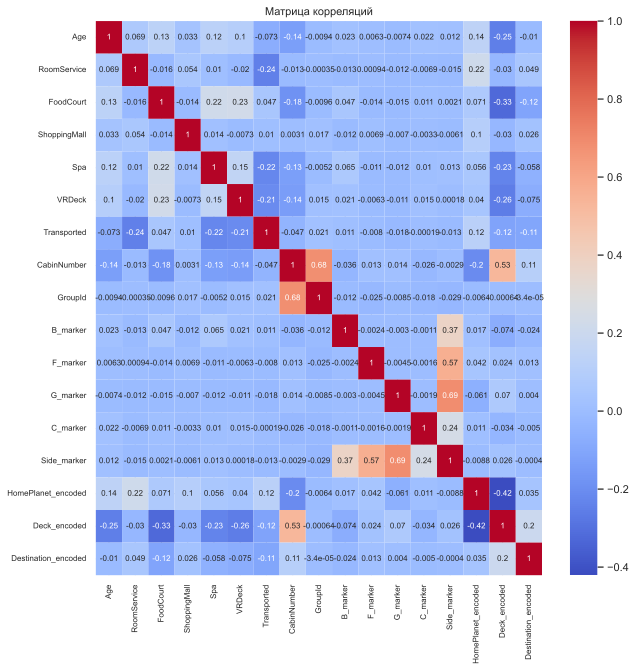

In [25]:
# Create a copy of df_train for correlation calculation
corr_df = df_train.copy()

# Encode categorical columns 'HomePlanet', 'Deck', and 'Destination' using LabelEncoder
corr_df['HomePlanet_encoded'] = label_encoder.fit_transform(corr_df['HomePlanet'])
corr_df['Deck_encoded'] = label_encoder.fit_transform(corr_df['Deck'])
corr_df['Destination_encoded'] = label_encoder.fit_transform(corr_df['Destination'])

# Get the list of all columns in the DataFrame
column_list = corr_df.columns.tolist()

# Create a list to store column names with more than one unique value (non-null columns)
non_null_columns = []

# Check each column to determine if it has more than one unique value
for column in column_list:
    if len(corr_df[column].unique()) > 1:
        non_null_columns.append(column)

# Calculate the correlation matrix for the selected non-null columns
correlation_matrix = corr_df[non_null_columns].corr()

# Create a heatmap plot with the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Reduce the font size on the axes for better readability
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8, rotation=0)

# Reduce the font size in the annotations on the heatmap
ax = plt.gca()
for text in ax.texts:
    text.set_fontsize(8)

# Set the title of the plot
plt.title('Матрица корреляций', fontsize=11)

# Show the plot
plt.show()


## Filling In Values In `'RoomService'`, `'FoodCourt'`, `'ShoppingMall'`, `'Spa'`, `'VRDeck'`

In [26]:
# List of numeric columns with missing values to analyze correlation with other numeric columns
num_columns_missing = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Loop through both DataFrames: df_train and df_test
for df in [df_train, df_test]:
    # Encode categorical columns as numeric using LabelEncoder
    df['HomePlanet_encoded'] = label_encoder.fit_transform(df['HomePlanet'])
    df['Deck_encoded'] = label_encoder.fit_transform(df['Deck'])
    df['Destination_encoded'] = label_encoder.fit_transform(df['Destination'])
    df['VIP_encoded'] = label_encoder.fit_transform(df['VIP'])
    df['CryoSleep_encoded'] = label_encoder.fit_transform(df['CryoSleep'])

# Get the list of all columns in the DataFrame
column_list = df_train.columns.tolist()

# Create a list to store column names with more than one unique value (non-null columns)
non_null_columns = []

# Check each column to determine if it has more than one unique value
for column in column_list:
    if len(df_train[column].unique()) > 1:
        non_null_columns.append(column)

# Create a dictionary to store top three correlated numeric columns for each 'num_columns_missing' in df_train
train_num_columns_missing_cors = {}

# Calculate the correlation for each 'num_columns_missing' in df_train
for i in num_columns_missing:
    # Create a DataFrame with the selected columns
    df_selected_columns = df_train[non_null_columns + [i]].drop(columns='Transported')

    # Calculate the correlation between the target column (i) and all other non-null numeric columns
    correlations = df_selected_columns.corr().iloc[:-1, -1]

    # Remove the correlation value of 1 (correlation of a column with itself)
    correlations = correlations[correlations.index != i]

    # Get the top three numeric columns with the highest absolute correlation
    train_num_columns_missing_cors[i] = correlations.abs().sort_values(ascending=False).index.tolist()[:3]


# Repeat the process for df_test
column_list = df_test.columns.tolist()
non_null_columns = []

for column in column_list:
    if len(df_test[column].unique()) > 1:
        non_null_columns.append(column)

# Create a dictionary to store top three correlated numeric columns for each 'num_columns_missing' in df_test
test_num_columns_missing_cors = {}

# Calculate the correlation for each 'num_columns_missing' in df_test
for i in num_columns_missing:
    # Create a DataFrame with the selected columns
    df_selected_columns = df_test[non_null_columns + [i]]

    # Calculate the correlation between the target column (i) and all other non-null numeric columns
    correlations = df_selected_columns.corr().iloc[:-1, -1]

    # Remove the correlation value of 1 (correlation of a column with itself)
    correlations = correlations[correlations.index != i]

    # Get the top three numeric columns with the highest absolute correlation
    test_num_columns_missing_cors[i] = correlations.abs().sort_values(ascending=False).index.tolist()[:3]


In [27]:
# Loop three times to fill missing values based on correlation for df_train
for i in range(3):
    for key, value in train_num_columns_missing_cors.items():
        group_columns = value
        
        # Calculate the filling values (mean) for 'key' based on 'group_columns'
        filling_values = df_train.groupby(value)[key].transform(lambda x: x.mean())
        
        # Fill missing values in 'key' using the calculated filling values
        df_train[key] = df_train[key].fillna(filling_values)
        
        # Remove the last element from the 'value' list (pop the highest correlated column)
        value.pop()

# Fill remaining missing values in 'num_columns_missing' for df_train with the mean of each column
for column in num_columns_missing:
    df_train[column].fillna(df_train[column].mean(), inplace=True)
    

# Loop three times to fill missing values based on correlation for df_test
for i in range(3):
    for key, value in test_num_columns_missing_cors.items():
        group_columns = value
        
        # Calculate the filling values (mean) for 'key' based on 'group_columns'
        filling_values = df_test.groupby(value)[key].transform(lambda x: x.mean())
        
        # Fill missing values in 'key' using the calculated filling values
        df_test[key] = df_test[key].fillna(filling_values)
        
        # Remove the last element from the 'value' list (pop the highest correlated column)
        value.pop()

# Fill remaining missing values in 'num_columns_missing' for df_test with the mean of each column
for column in num_columns_missing:
    df_test[column].fillna(df_test[column].mean(), inplace=True)


In [28]:
# Loop through both DataFrames: df_train and df_test
for df in [df_train, df_test]:
    # List of columns to delete (encoded categorical columns)
    columns_to_delete = [
        'HomePlanet_encoded', 'Deck_encoded', 'Destination_encoded', 'VIP_encoded', 'CryoSleep_encoded'
    ]
    
    # Drop the specified columns from the DataFrame
    df.drop(columns=columns_to_delete, inplace=True)



## Filling In Missing Values In `'CryoSleep'`, `'VIP'`

In [29]:
# Loop through both DataFrames: df_train and df_test
for df in [df_train, df_test]:
    # Calculate the 'Total_Expense' for each row as the sum of specified columns
    df['Total_Expense'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

    # Iterate through each row in the DataFrame for columns 'CryoSleep' and 'VIP'
    for key, val in df[['CryoSleep', 'VIP']].iterrows():
        # Calculate the mean of 'Total_Expense' for the current row
        mean_cryo = df.loc[key, 'Total_Expense'].mean()
        mean_vip = df.loc[key, 'Total_Expense'].mean()

        # Check the condition for 'CryoSleep' based on the mean of 'Total_Expense'
        if mean_cryo > 0:
            df.loc[df['CryoSleep'].isna(), 'CryoSleep'] = True
        else:
            df.loc[df['CryoSleep'].isna(), 'CryoSleep'] = False

        # Check the condition for 'VIP' based on the mean of 'Total_Expense'
        if mean_vip > df.loc[df['VIP'] == 1, 'Total_Expense'].quantile(0.5):
            df.loc[df['VIP'].isna(), 'VIP'] = True
        else:
            df.loc[df['VIP'].isna(), 'VIP'] = False


In [30]:
df_train.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            199
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             200
Transported        0
Deck               0
CabinNumber        0
Side               0
GroupId            0
NumberInGroup      0
B_marker           0
F_marker           0
A_marker           0
G_marker           0
E_marker           0
D_marker           0
C_marker           0
T_marker           0
Side_marker        0
Total_Expense      0
dtype: int64

# Visualization

### HomePlanet - CryoSleep

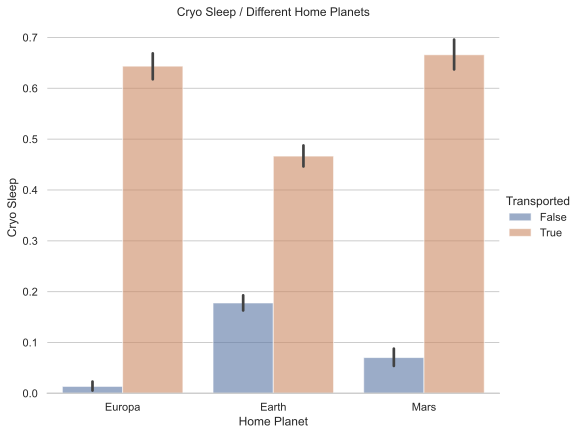

In [31]:
# Create a copy of the DataFrame for visualization
visual = df_train.copy()

# Set the style for the plot
sns.set(style='whitegrid')

# Create the catplot
g = sns.catplot(data=visual, x='HomePlanet', y='CryoSleep', kind='bar', hue='Transported', alpha=0.6,
                height=6, aspect=1.2)

# Customize the plot
g.despine(left=True)
g.set_axis_labels('Home Planet', 'Cryo Sleep')
# Set the title using plt.title()
plt.title('Cryo Sleep / Different Home Planets')

# Show the plot
plt.show()

### HomePlanet - Side

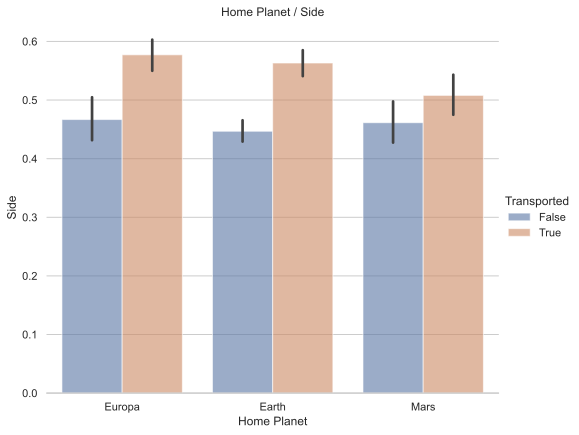

In [32]:

# Encode categorical columns using LabelEncoder
visual['HomePlanet_encoded'] = label_encoder.fit_transform(visual['HomePlanet'])
visual['Deck_encoded'] = label_encoder.fit_transform(visual['Deck'])
visual['Destination_encoded'] = label_encoder.fit_transform(visual['Destination'])
visual['Side_encoded'] = label_encoder.fit_transform(visual['Side'])
visual['NumberInGroup'] = visual['NumberInGroup'].astype(int)

# Set the style for the plot
sns.set(style='whitegrid')

# Create the catplot (bar plot)
g = sns.catplot(data=visual, x='HomePlanet', y='Side_encoded', hue='Transported', kind='bar',
                alpha=0.6, height=6, aspect=1.2)

# Customize the plot
g.despine(left=True)
g.set_axis_labels('Home Planet', 'Side')
plt.title('Home Planet / Side')

# Show the plot
plt.show()
    

### Destination - Side

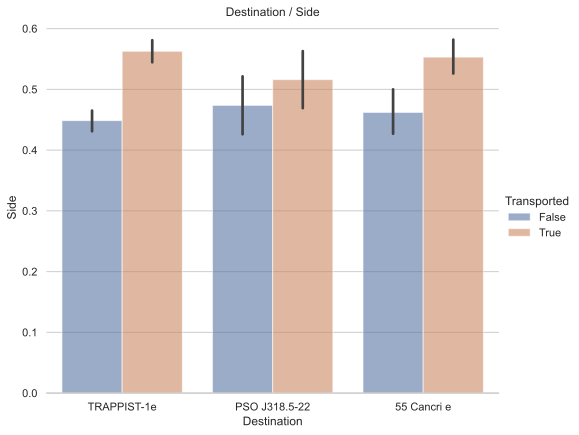

In [33]:
# Set the style for the plot
sns.set(style='whitegrid')

# Create the catplot (bar plot)
g = sns.catplot(data=visual, x='Destination', y='Side_encoded', hue='Transported', kind='bar',
                alpha=0.6, height=6, aspect=1.2)

# Customize the plot
g.despine(left=True)
g.set_axis_labels('Destination', 'Side')
plt.title('Destination / Side')

# Show the plot
plt.show()

### Home Planet - Age

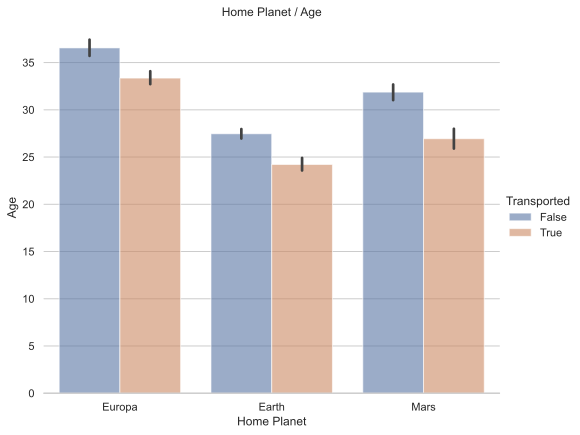

In [34]:
# Set the style for the plot
sns.set(style='whitegrid')

# Create the catplot (bar plot)
g = sns.catplot(data=visual, x='HomePlanet', y='Age', kind='bar', hue='Transported', alpha = 0.6,
                height=6, aspect=1.2)

# Customize the plot
g.despine(left=True)
g.set_axis_labels('Home Planet', 'Age')
plt.title('Home Planet / Age')

# Show the plot
plt.show()

### Side - Age

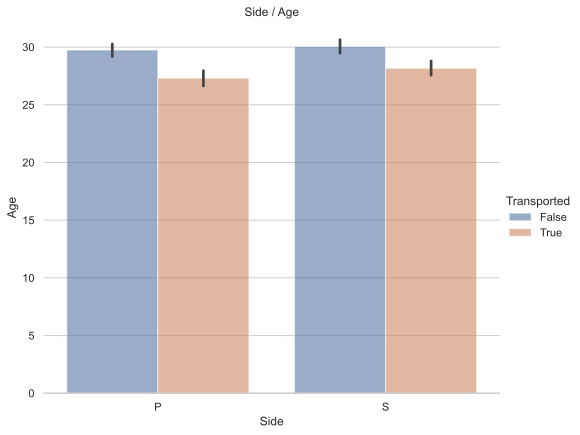

In [35]:
# Set the style for the plot
sns.set(style='whitegrid')

# Create the catplot (bar plot)
g = sns.catplot(data=visual, x='Side', y='Age', kind='bar', hue='Transported', alpha = 0.6, height=6, aspect=1.2)

# Customize the plot
g.despine(left=True)
g.set_axis_labels('Side', 'Age')
plt.title('Side / Age')

# Show the plot
plt.show()

### Deck - Age

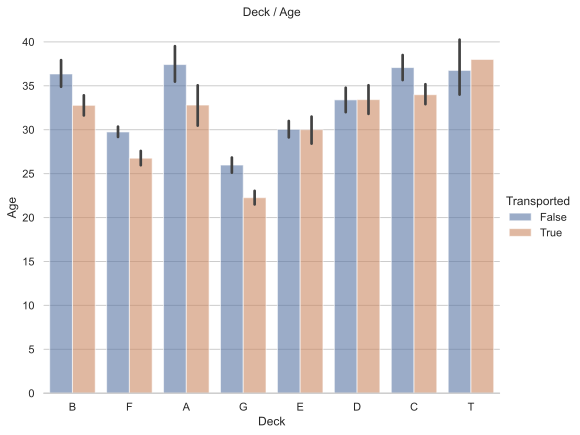

In [36]:
# Set the style for the plot
sns.set(style='whitegrid')

# Create the catplot (bar plot)
g = sns.catplot(data=visual, x='Deck', y='Age', kind='bar', hue='Transported', alpha = 0.6, height=6, aspect=1.2)

# Customize the plot
g.despine(left=True)
g.set_axis_labels('Deck', 'Age')
plt.title('Deck / Age')

# Show the plot
plt.show()

### Deck - CryoSleep

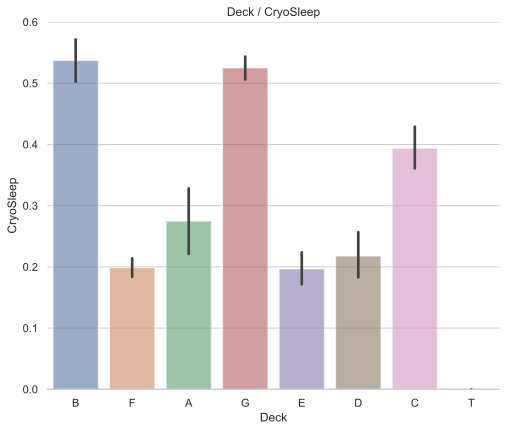

In [37]:
# Set the style for the plot
sns.set(style='whitegrid')

visual['CryoSleep'] = visual['CryoSleep'].apply(lambda x: int(x + 0.5) if x % 1 >= 0.5 else int(x))

# Create the catplot (bar plot)
g = sns.catplot(data=visual, x='Deck', y='CryoSleep', kind='bar', alpha = 0.6, height=6, aspect=1.2)

# Customize the plot
g.despine(left=True)
g.set_axis_labels('Deck', 'CryoSleep')
plt.title('Deck / CryoSleep')

# Show the plot
plt.show()

## Conclusions


**Observations:**

1. Representatives from the planet Europa, who were in cryosleep, have the highest ratio of being "Transported."

2. Passengers from the planet Earth are, on average, younger than representatives from other planets.

3. Passengers traveling on the 'S' side have the highest ratio of being "Transported."

4. Passengers from Earth are, on average, younger than representatives from other planets.

5. The highest proportion of passengers in cryosleep is observed among those on Decks B, G, and C.

6. The highest ratio of True Transported is observed among passengers from the planet Europa. There are the most representatives from planet Earth, but the ratio of True Transported among them is significantly lower. For passengers from planet Mars, the distribution is almost equal.

7. The ratio of True Transported is considerably higher for passengers who underwent cryosleep compared to those who did not.

8. The majority of passengers traveled to TRAPPIST-1e, but the highest ratio of True Transported is among passengers heading to 55 Cancri e.

9. VIP status does not significantly influence the ratio of True Transported.

10. The highest ratio of True Transported is among passengers from decks B and C.

11. The "Side" feature divides all passengers in half, with the highest ratio of True Transported among those from side S.

12. Most passengers traveled alone, but the highest ratio of True Transported is observed among groups of up to 4 people.


**These observations suggest that certain factors, such as the planet of origin, cryosleep status, and deck location, may have an impact on the likelihood of passengers being "Transported." Additionally, age and travel companions also appear to be factors that influence the chances of being "Transported." Further analysis and investigations may be needed to better understand the underlying reasons and implications of these patterns.**

**Выводы:**


1. Представители планеты Europa, находившиеся в криосне, имеют наивысшее соотношение "Transported" по сравнению с другими планетами.

2. Пассажиры с планеты Земля (Earth) в среднем моложе, чем представители других планет.

3. Пассажиры, путешествующие на стороне 'S', имеют наивысшее соотношение "Transported".

4. Пассажиры с планеты Земля (Earth) в среднем моложе, чем представители других планет.

5. Наибольшее количество пассажиров в криосне наблюдается среди тех, кто находится на палубах B, G и C.

6. Наибольшее соотношение "True Transported" наблюдается у представителей планеты Europa. Больше всего представителей планеты Земля (Earth), но соотношение "True Transported" у них значительно ниже. У пассажиров с планеты Mars распределение практически равномерное.

7. Соотношение "True Transported" существенно выше у пассажиров, проходивших криосон, по сравнению с теми, кто этого не делал.

8. Большинство пассажиров отправлялись на TRAPPIST-1e, но наибольшее соотношение "True Transported" наблюдается у пассажиров, направляющихся на 55 Cancri e.

9. Статус VIP не оказывает существенного влияния на соотношение "True Transported".

10. Наивысшее соотношение "True Transported" наблюдается у пассажиров, находящихся на палубах B и C.

11. Признак "Side" делит всех пассажиров пополам, и наибольшее соотношение "True Transported" наблюдается у тех, кто находится на стороне S.

12. Большинство пассажиров путешествовали в одиночку, но наибольшее соотношение "True Transported" наблюдается у групп из до 4 человек.

**Эти наблюдения указывают на то, что определенные факторы, такие как планета происхождения, статус криосна и расположение на палубе, могут оказывать влияние на вероятность попадания пассажиров в состояние "Transported". Кроме того, возраст и путешествие c сопровождающими также кажутся факторами, которые влияют на шансы быть "Transported". Для более глубокого понимания причин и последствий этих закономерностей может потребоваться дополнительный анализ и исследования.**

# Feature Engeneering

In [38]:
# Map 'Transported' column in df_train from boolean to integer (0 for False, 1 for True)
df_train['Transported'] = df_train['Transported'].map({False: 0, True: 1})

# Create a copy of 'PassengerId' column in df_test
df_passengerId = df_test['PassengerId'].copy()

# List of features for which dummy variables will be created
dummy_features = ['HomePlanet', 'Deck', 'Destination', 'Side', 'NumberInGroup']

# Create dummy variables for each feature in dummy_features in df_train
for feature in dummy_features:
    df_train_dummies = pd.get_dummies(df_train[feature])
    df_train_dummies = df_train_dummies.astype(int)
    df_train = pd.concat([df_train, df_train_dummies], axis=1)

# Calculate the mean of 'Total_Expense' for each group formed by the combination of 'HomePlanet', 
# 'CryoSleep', 'Deck', and 'Age'
df_train['HomePlanet_CryoSleep_Deck_Age'] = df_train.groupby([
    'HomePlanet', 'CryoSleep', 'Deck', 'Age'])['Total_Expense'].transform('mean')

# Create dummy variables for each feature in dummy_features in df_test
for feature in dummy_features:
    df_test_dummies = pd.get_dummies(df_test[feature])
    df_test_dummies = df_test_dummies.astype(int)
    df_test = pd.concat([df_test, df_test_dummies], axis=1)

# Calculate the mean of 'Total_Expense' for each group formed by the combination of 'HomePlanet',
# 'CryoSleep', 'Deck', and 'Age'
df_test['HomePlanet_CryoSleep_Deck_Age'] = df_test.groupby([
    'HomePlanet', 'CryoSleep', 'Deck', 'Age'])['Total_Expense'].transform('mean')



## Outliers

In [39]:
# Loop through both DataFrames: df_test and df_train
for df in [df_test, df_train]:
    # List of columns to apply the logarithmic transformation
    outlier_features = [col for col in df.drop(columns=[
        'Age', 'CabinNumber', 'GroupId']).select_dtypes(include=['int', 'float']) if len(df[col].unique()) > 2]
    
    # Apply the logarithmic transformation to each numeric column in outlier_features
    for outlier in outlier_features:
        df[outlier] = np.log(df[outlier] + 0.1)
        

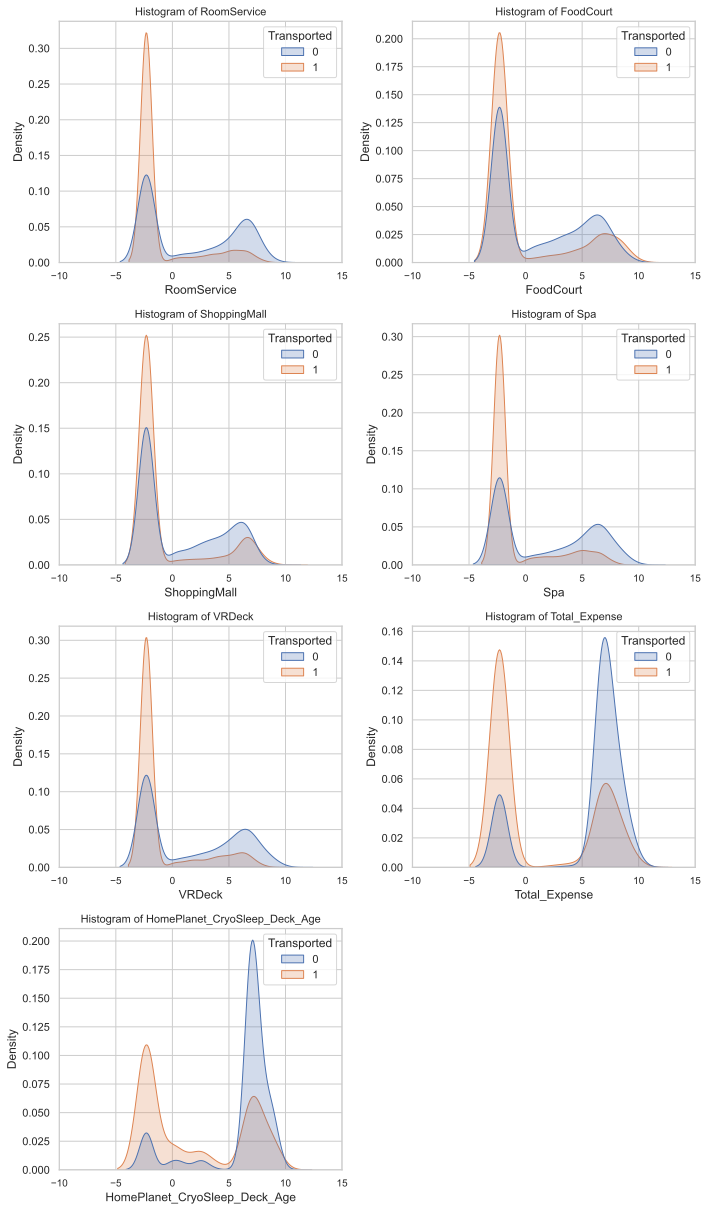

In [40]:
# Create a subplot grid with 4 rows and 2 columns to accommodate the histograms
fig, axes = plt.subplots(4, 2, figsize=(10, 17))

# Iterate through each feature in the outlier_features list and plot the KDE histogram
for i, feature in enumerate(outlier_features):
    # Calculate the row and column index for the current subplot
    row = i // 2
    col = i % 2
    
    # Get the axis corresponding to the current subplot
    ax = axes[row, col]
    
    # Plot the KDE histogram using Seaborn's kdeplot function
    sns.kdeplot(data=df_train, x=feature, hue='Transported', shade=True, ax=ax)
    
    # Set the title for the subplot
    ax.set_title(f'Histogram of {feature}', fontsize=11)
    
    # Set the x-tick labels to be the same as the x-tick positions
    ax.set_xticks(ax.get_xticks())
    
    # Set the font size for the x-tick labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)

# Hide the last empty subplots (if any) in the subplot grid
for i in range(len(outlier_features), len(axes.flat)):
    axes.flat[i].axis('off')

# Adjust the layout of subplots to fit in the figure
plt.tight_layout()

# Show the plot
plt.show()


## Using Entropy Approach to Detect and Handle Outliers

In [41]:
%%time
# Loop through both DataFrames: df_train and df_test
for df in [df_train, df_test]:
    # Get a list of numeric columns that have more than 2 unique values
    numeric_columns = [col for col in df.select_dtypes(include=['int', 'float']) if len(df[col].unique()) > 2]

    # Calculate the entropy for each numeric column
    for column in numeric_columns:
        # Group the DataFrame by the values in the current numeric column and calculate the entropy for each group
        entropy = df.groupby(df[column]).apply(
            lambda x: -sum(x.value_counts(normalize=True) * np.log2(x.value_counts(normalize=True))))

        # Use the calculated entropy values as new features in the DataFrame
        df['Entropy_' + column] = df[column].map(entropy)


CPU times: user 8min 16s, sys: 1.26 s, total: 8min 17s
Wall time: 8min 17s


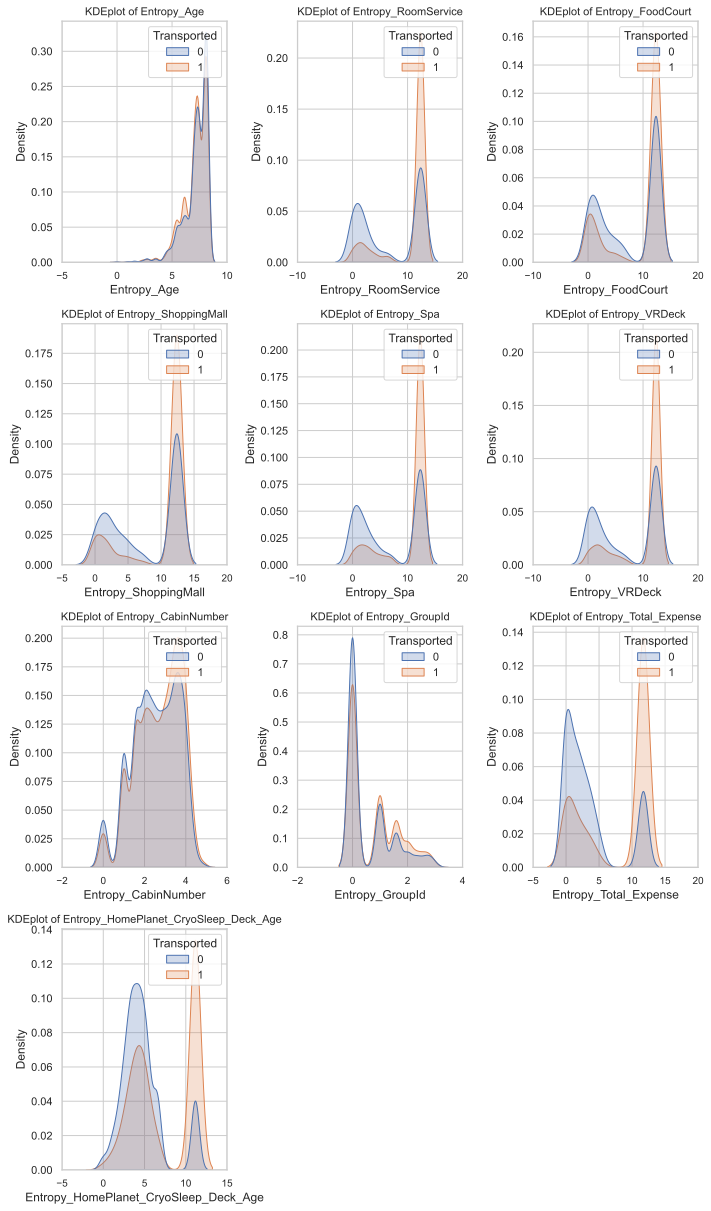

In [42]:
# Create a subplot grid with 4 rows and 3 columns to accommodate the KDE plots
fig, axes = plt.subplots(4, 3, figsize=(10, 17))

# Get a list of all numeric features that have more than 2 unique values and start with the prefix 'Entropy_'
features = [col for col in df_train.select_dtypes(include=['int', 'float']) 
            if len(df_train[col].unique()) > 2 and 'Entropy_' in col]

# Iterate through each feature in the 'features' list and plot the KDE plot
for i, feature in enumerate(features):
    if i < len(axes.flat):  # To skip the last empty subplot if there are fewer than 12 features
        ax = axes.flat[i]
        
        # Plot the KDE plot using Seaborn's kdeplot function
        sns.kdeplot(data=df_train, x=feature, hue='Transported', shade=True, ax=ax)
        
        # Set the title for the subplot
        ax.set_title(f'KDEplot of {feature}', fontsize=11)
        
        # Set the x-tick labels to be the same as the x-tick positions
        ax.set_xticks(ax.get_xticks())
        
        # Set the font size for the x-tick labels
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10) 

# Hide the last empty subplots (if any) in the subplot grid
for i in range(len(features), len(axes.flat)):
    axes.flat[i].axis('off')

# Adjust the layout of subplots to fit in the figure
plt.tight_layout()

# Show the plot
plt.show()


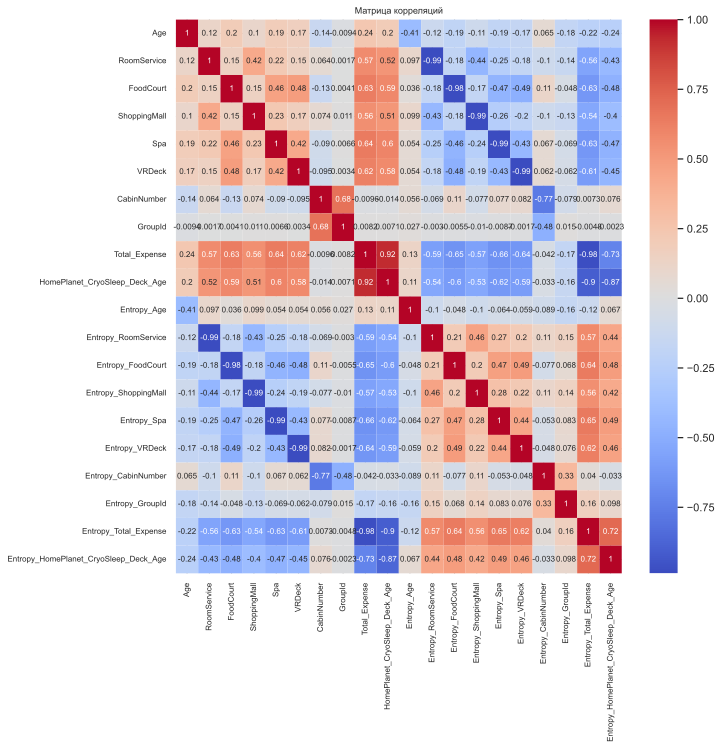

In [43]:
# Create a list containing column names of numeric features with more than 2 unique values
column_list = df_train.columns.tolist()
non_null_columns = []
for column in column_list:
    if len(df_train[column].unique()) > 2:
        non_null_columns.append(column)

# Calculate the correlation matrix for the selected numeric features
correlation_matrix = df_train[non_null_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Reduce the font size on the x and y axes
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8, rotation=0)

# Reduce the font size in the heatmap annotations
ax = plt.gca()
for text in ax.texts:
    text.set_fontsize(8)

# Set the title for the heatmap
plt.title('Correlation matrix', fontsize=9)

# Display the heatmap
plt.show()


**To address multicollinearity, I'll employ L2 regularization in CatBoost, reducing the impact of correlated features and enhancing model stability and feature importance. This will mitigate the impact of correlated features, ensuring better model generalization and accurate feature importance rankings, while still benefiting from CatBoost's inherent ability to handle multicollinearity.**

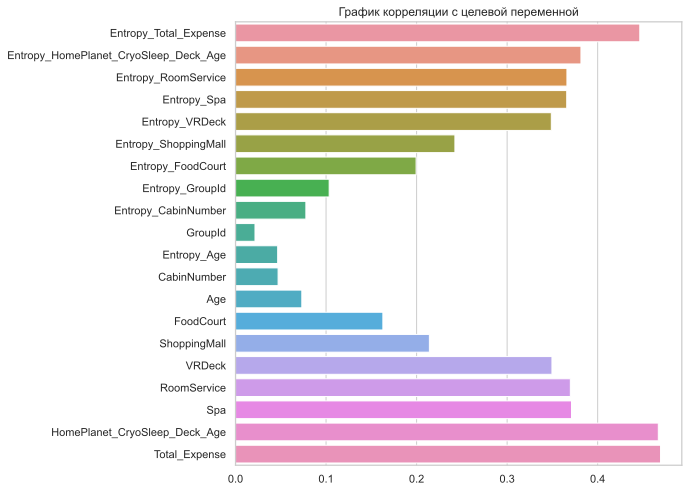

In [44]:
# Create a list containing column names of numeric features with more than 2 unique values 
# and excluding single-value features
column_list = df_train.columns.tolist()
non_null_columns = []
for column in column_list:
    if 1 < len(df_train[column].unique()) > 2:
        non_null_columns.append(column)

# Define the target feature and a sample feature for correlation analysis
target_feature = 'Transported'
sample_features = 'CryoSleep'

# Define a list of numeric feature names for correlation analysis
NUMERIC_FEATURE_NAMES = non_null_columns

# Calculate the correlation between each numeric feature and the target feature
corr_with_target = df_train[
    NUMERIC_FEATURE_NAMES + [sample_features] + [target_feature]].corr().iloc[:-1, -1]\
.sort_values(ascending=False).abs()

# Create a figure and axes for the correlation bar plot
plt.figure(figsize=(8, 8))

# Plot the bar chart for correlation with the target feature
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

# Set the title for the correlation plot
plt.title('Correlation with Targer feature')

# Display the plot
plt.show()




# Modeling

## Train Section

In [45]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    """
    Function to display classification reports and confusion matrix for a classification model.

    Parameters:
        y_train_true (array-like): True labels of the training dataset.
        y_train_pred (array-like): Predicted labels of the training dataset.
        y_test_true (array-like): True labels of the testing dataset.
        y_test_pred (array-like): Predicted labels of the testing dataset.

    Returns:
        The classification reports and confusion matrix.

    """

    # Display classification report for the training dataset
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    
    # Display classification report for the testing dataset
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    
    # Display confusion matrix for the testing dataset
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))


In [46]:
# Selecting columns of numerical data types (float and int) from the DataFrame 'df_train'
df_train = df_train.select_dtypes([float, int])

# Defining the target feature name, which appears to be the column named 'Transported'
TARGET_NAME = 'Transported'

# Creating a list of base feature names by excluding the target feature from the column list
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()

# Creating a list of binary feature names by selecting columns with only two unique values
BINARY_FEATURE_NAMES = [col for col in BASE_FEATURE_NAMES if len(df_train[col].unique()) <= 2]

# Creating a list of numerical feature names by selecting columns with more than two unique values and
# excluding columns with a maximum value of 1 (presumably excluding binary encoded columns)
NUM_FEATURE_NAMES = [
    col for col in df_train.columns if (len(df_train[col].unique())) > 2 and (df_train[col].max() != 1)]

# Creating a final list of selected feature names by combining numerical and binary feature names
SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + BINARY_FEATURE_NAMES


## Data Normalization

In [47]:
# Creating an instance of StandardScaler, which will be used to scale the numerical features
scaler = StandardScaler()

# Creating a copy of the DataFrame 'df_train' for normalization
# This step ensures that the original DataFrame is preserved, and the normalization is performed on the copy
df_norm = df_train.copy()

# Normalizing the numerical features using StandardScaler
# 'scaler.fit_transform' computes the mean and standard deviation of the features and scales them accordingly
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

# Assigning the normalized values back to the original DataFrame 'df_train'
# This step updates the 'df_train' DataFrame with the normalized values
df_train = df_norm.copy()


## Saving the Scaler

In [48]:
# Importing the 'pickle' module
import pickle

# SCALER_FILE_PATH is a variable that contains the file path where the StandardScaler object will be saved
# This file path should include the desired file name and extension (e.g., './scaler/scaler.pkl')

# Opening the file in binary write mode ('wb')
# The 'wb' mode is used for writing binary data to the file
with open(SCALER_FILE_PATH, 'wb') as file:
    # Using the 'pickle.dump' method to save the 'scaler' object to the file
    # The first argument is the object to be pickled (in this case, the 'scaler' object)
    # The second argument is the file object to which the data will be written
    pickle.dump(scaler, file)


## Splitting the Dataset into `X_train`, `X_test`, `y_train`, `y_test` to Evaluate the Model

In [49]:
# SELECTED_FEATURE_NAMES contains the list of selected features (numeric and binary) for training the model
# TARGET_NAME contains the name of the target variable that needs to be predicted (Transported)

# X is the feature matrix containing the selected features (independent variables)
X = df_train[SELECTED_FEATURE_NAMES]

# y is the target vector containing the values of the target variable (dependent variable)
y = df_train[TARGET_NAME]

# The 'train_test_split' function is used to split the data into training and testing sets.
# X_train: Training feature matrix (used to train the model)
# X_test: Testing feature matrix (used to evaluate the model's performance)
# y_train: Training target vector (corresponding to the training feature matrix)
# y_test: Testing target vector (corresponding to the testing feature matrix)
# The 'shuffle=True' parameter ensures that the data is randomly shuffled before splitting.
# The 'test_size=0.30' parameter specifies that 30% of the data will be used for testing, and 70% for training.
# The 'random_state=21' parameter is used to set a random seed for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)


In [50]:
# Concatenate X_train and y_train into a single DataFrame called 'train'
train = pd.concat([X_train, y_train], axis=1)

# Concatenate X_test and y_test into a single DataFrame called 'test'
test = pd.concat([X_test, y_test], axis=1)


## Saving the Prepared Datasets

In [51]:
# Save the 'train' DataFrame to a CSV file at the specified path
train.to_csv(PREPREPARED_TRAIN_DATASET_PATH, index=False)

# Save the 'test' DataFrame to a CSV file at the specified path
test.to_csv(PREPREPARED_TEST_DATASET_PATH, index=False)


## Selecting a Model

In [52]:
# List of base models with their corresponding names and model instances
base_models = [
    ('catb', catb.CatBoostClassifier(l2_leaf_reg=20, silent=True, random_state=21)),
    ('lgbm', lgbm.LGBMClassifier(random_state=21)),
    ('svc', SVC(kernel='linear', probability=True, random_state=21)), 
    ('logistic', LogisticRegression()), 
    ('knn', KNeighborsClassifier(n_neighbors=5)), 
    ('rf', RandomForestClassifier(n_estimators=100, random_state=21)),
    ('decision', DecisionTreeClassifier()),
    ('bayes', GaussianNB()),
    ('grdboost', GradientBoostingClassifier(n_estimators=600, learning_rate=0.1, max_depth=5, random_state=21))
]

# Train and evaluate each base model
for name, model in base_models:
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict using the model
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy on the test set
    print(f'Accuracy of {name}: {acc:.5f}')  # Print the accuracy score


Accuracy of catb: 0.82132
Accuracy of lgbm: 0.80675
Accuracy of svc: 0.78336
Accuracy of logistic: 0.78528
Accuracy of knn: 0.75844
Accuracy of rf: 0.80406
Accuracy of decision: 0.73198
Accuracy of bayes: 0.73121
Accuracy of grdboost: 0.79908


## Model Tuning

In [79]:
%%time
# Define the hyperparameter grid for CatBoostClassifier
param_grid = {
    'learning_rate': [0.1, 0.03, 0.05],
    'max_depth': [6, 8, 9],
    'n_estimators': [700, 800, 900],
    'l2_leaf_reg': [50, 60, 70]
}

# Create the CatBoostClassifier model
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(model_catb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Create the final tuned CatBoost model with best hyperparameters
final_model = catb.CatBoostClassifier(silent=True, random_state=21, **best_params)

# Train the final model on the entire training dataset
final_model.fit(X_train, y_train)

# Make predictions on training and test datasets
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Display the classification report
get_classification_report(y_train, y_train_pred, y_test, y_test_pred)


# 'best_params' holds the best hyperparameters found during hyperparameter tuning.
# These hyperparameters optimize the performance of the CatBoost model.
# Output the best_params dictionary to show the best hyperparameters found.
print("\nBest Hyperparameters Found:")
print("- l2_leaf_reg:", best_params['l2_leaf_reg'])
print("- learning_rate:", best_params['learning_rate'])
print("- max_depth:", best_params['max_depth'])
print("- n_estimators:", best_params['n_estimators\n'])

Accuracy: 0.8151840490797546
TRAIN

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3025
           1       0.91      0.92      0.92      3060

    accuracy                           0.92      6085
   macro avg       0.92      0.92      0.92      6085
weighted avg       0.92      0.92      0.92      6085

TEST

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1290
           1       0.82      0.81      0.82      1318

    accuracy                           0.82      2608
   macro avg       0.82      0.82      0.82      2608
weighted avg       0.82      0.82      0.82      2608

CONFUSION MATRIX

col_0           0     1
Transported            
0            1055   235
1             247  1071
Best Hyperparameters Found:
- l2_leaf_reg: 50
- learning_rate: 0.1
- max_depth: 6
- n_estimators: 800
CPU times: user 3h 2min 43s, sys: 14min 52s, total: 3h 17min 35s
Wall time: 27min 47s


## Validating the Model

In [90]:
# Create and train the CatBoost model
model_catb = catb.CatBoostClassifier(n_estimators=900, max_depth=6, learning_rate=0.03, l2_leaf_reg=50,
                                     silent=True, random_state=21)
model_catb.fit(X_train, y_train)

# Predict the target variable on the training and test datasets
y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Display the classification report
get_classification_report(y_train, y_train_pred, y_test, y_test_pred)


Accuracy: 0.8240030674846626
TRAIN

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3025
           1       0.85      0.88      0.87      3060

    accuracy                           0.86      6085
   macro avg       0.86      0.86      0.86      6085
weighted avg       0.86      0.86      0.86      6085

TEST

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1290
           1       0.82      0.84      0.83      1318

    accuracy                           0.82      2608
   macro avg       0.82      0.82      0.82      2608
weighted avg       0.82      0.82      0.82      2608

CONFUSION MATRIX

col_0           0     1
Transported            
0            1042   248
1             211  1107


## Save the CatBoost Model

In [55]:
# Save the CatBoost model to a file
with open(MODEL_PATH, 'wb') as file:
    pickle.dump(model_catb, file)


## Evaluate the Model

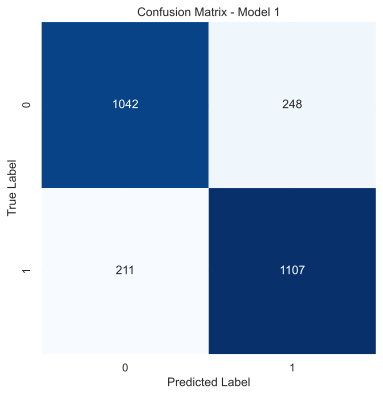

In [56]:
# Create confusion matrices for each model
cm_model = confusion_matrix(y_test, y_test_pred)


# Function to plot the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(cm_model, 'Model 1')

## Visualize the Model

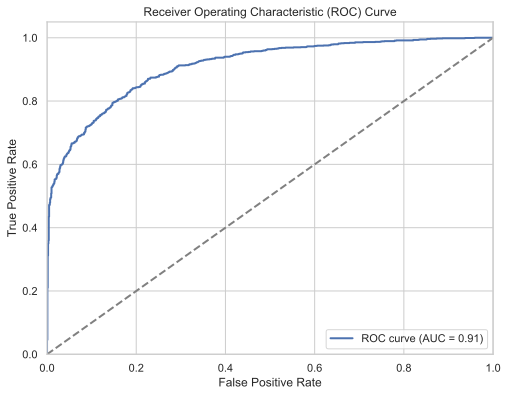

In [85]:
model = catb.CatBoostClassifier(n_estimators=900, max_depth=6, l2_leaf_reg=50, silent=True, 
                                random_state=21, learning_rate=0.03)

# Fit the classifier to the training data
model.fit(X_train, y_train)


# Predict probabilities of positive class (class 1) for the test data
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

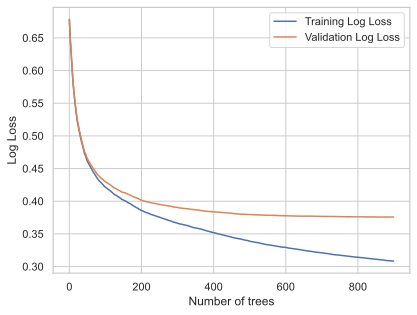

In [86]:
# Create a CatBoostClassifier model with specified hyperparameters.
model = catb.CatBoostClassifier(n_estimators=900, max_depth=6, l2_leaf_reg=50, silent=True, random_state=21,
                                learning_rate=0.03, loss_function='Logloss')

# Train the model on the training data and evaluate it on the test data.
model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

# Get the number of training iterations (logs) during the training process.
logs = model.get_all_params()['iterations']

# Get the evaluation results during training (e.g., Logloss, Accuracy, etc.).
eval_results = model.get_evals_result()

# Get the keys of the eval_results dictionary and convert them to a list.
eval_keys = list(eval_results.keys())

# Assuming 'Logloss' is the correct key for the log loss, update the plotting code as follows.
# Plot the training and validation Log Loss over the number of trees (iterations).
plt.plot(eval_results[eval_keys[0]]['Logloss'], label='Training Log Loss')
plt.plot(eval_results[eval_keys[1]]['Logloss'], label='Validation Log Loss')
plt.xlabel("Number of trees")
plt.ylabel("Log Loss")
plt.legend()
plt.show()


## Variable importances

In [59]:
# Get the feature importances from the trained CatBoostClassifier model.
feature_importance = model_catb.feature_importances_

# Sort the indices of the features in descending order based on their importance.
sorted_indices = feature_importance.argsort()[::-1]

# Get the feature names based on the sorted indices.
sorted_features = X_train.columns[sorted_indices]

# Get the sorted feature importances.
sorted_importance = feature_importance[sorted_indices]

# Output the feature names and their corresponding importances in descending order.
for feature, importance in zip(sorted_features, sorted_importance):
    print(f"{feature}: {importance}")


HomePlanet_CryoSleep_Deck_Age: 8.194708821061273
Earth: 6.945660359737711
Spa: 6.726657999337178
CabinNumber: 6.641042884053368
Total_Expense: 6.339904667890801
FoodCourt: 5.839790802111612
VRDeck: 5.434745811212523
Europa: 4.82996119988195
RoomService: 4.663124144503115
Entropy_Total_Expense: 4.0031104752580395
E: 3.984202981436033
GroupId: 3.6426170807691514
G: 3.311441534502548
ShoppingMall: 3.292896900860696
S: 2.528735583709242
P: 2.451118115132151
Entropy_VRDeck: 2.347599390016848
Entropy_Age: 2.1942307162949644
Mars: 2.0407654043212626
Entropy_Spa: 1.8823754648240063
F: 1.6368803073686125
Age: 1.612390113536428
C: 1.3923656677972953
Entropy_RoomService: 1.374281551123496
Entropy_CabinNumber: 1.2941111230425157
Entropy_HomePlanet_CryoSleep_Deck_Age: 1.2059393430660692
Entropy_FoodCourt: 1.127621593832235
TRAPPIST-1e: 0.8219657132976282
55 Cancri e: 0.6413144414529934
Entropy_ShoppingMall: 0.4071566190854466
Entropy_GroupId: 0.36955739082353606
A: 0.2138980812481484
03: 0.16949909

## Test Section

In [60]:
# Get the list of column names containing numeric data (float and int) from the 'df_test' DataFrame.
numeric_columns = df_test.select_dtypes(include=[float, int]).columns.tolist()

# Define the name of the target variable.
TARGET_feature = 'PassengerId'

# Create a list of all column names in the 'df_test' DataFrame.
BASE_FEATURE_NAMES = df_test.columns.tolist()

# Identify binary features (having only two unique values) and exclude object data type columns.
BINARY_FEATURE_NAMES = [col for col in BASE_FEATURE_NAMES if len(df_test[col].unique()) <= 2 and 
                        df_test[col].dtype != 'object']

# Identify numeric features (having more than two unique values) and exclude object data type columns.
NUM_FEATURE_NAMES = [col for col in df_test.columns if len(df_test[col].unique()) > 2 and 
                     df_test[col].dtype != 'object']

# Combine the lists of numeric and binary feature names to create the final selected feature names.
SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + BINARY_FEATURE_NAMES


In [61]:
# Create a copy of the 'df_test' DataFrame for normalization.
df_norm = df_test.copy()

# Apply data normalization to the numeric features using the 'scaler' object.
df_norm[NUM_FEATURE_NAMES] = scaler.transform(df_norm[NUM_FEATURE_NAMES])

# Update the 'df_test' DataFrame with the normalized numeric features.
df_test = df_norm.copy()

# Create a new DataFrame 'X' containing only the selected features from 'df_test.'
X = df_test[SELECTED_FEATURE_NAMES].copy()

# Create a separate DataFrame 'df_passengerId' containing the 'PassengerId' column as the target variable.
df_passengerId = df_test[TARGET_feature].copy()


## Saving the Prepared Datasets

In [62]:
# Save the 'df_test' DataFrame to a CSV file at the specified path.
df_test.to_csv(PREPARED_TEST_DATASET_PATH, index=False)


## Deploying the Model

In [75]:
# Generate predictions using the trained CatBoostClassifier model on the 'X' DataFrame.
predictions = model_catb.predict(X)

# Create a DataFrame 'df_predictions' with the predictions, setting the column name to 'Transported.'
df_predictions = pd.DataFrame(predictions, columns=['Transported'], index=df_passengerId.index)

# Map the predicted numeric values (0 and 1) to their corresponding boolean values (False and True).
df_predictions = df_predictions['Transported'].map({0: False, 1: True})

# Combine the 'PassengerId' and 'Transported' columns into a new DataFrame 'df_combined.'
df_combined = pd.concat([df_passengerId, df_predictions], axis=1)

# Reset the DataFrame index and set 'PassengerId' as the new index for 'df_for_submission.'
df_for_submission = df_combined.set_index('PassengerId')

# Save the 'df_for_submission' DataFrame to a CSV file at the specified path.
df_for_submission.to_csv(PREDICTED_DATASET_PATH)


## Submission

In [76]:
# Read the CSV file located at the specified path into a new DataFrame 'new_df'.
new_df = pd.read_csv(PREDICTED_DATASET_PATH)

# Display the contents of the 'new_df' DataFrame.
new_df

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]